# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In the lab, you will complete all the code marked `TODO`. 

First, complete the following code that uses the `pd.read_csv` command to read the data from the file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

I have supplied a list `names` of the column headers.  You will have to set the options in the `read_csv` command to correctly delimit the data in the file and name the columns correctly.

In [1]:
import pandas as pd
import numpy as np
colnames =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

# TODO:  Complete the code
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None,delim_whitespace=True,names=colnames,na_values='?')

Display the first six rows of the data frame

In [2]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [3]:
# TODO
shape = df.shape
print('num samples=', shape[0] ,', num attributes=', shape[1]) 

num samples= 506 , num attributes= 14


Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.array` structure.

In [4]:
# TODO
Y0 = df['PRICE']
Y1 = Y0.dropna()

y = Y1.values

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!). Print and label your results.

In [5]:
# TODO

np.mean(y)


22.532806324110677

## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.

In [7]:
# TODO
x = df['RM'].values

Create a scatter plot of the price vs. the `RM` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

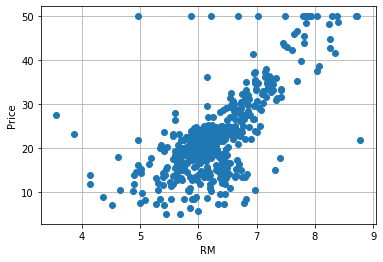

In [8]:
# TODO
plt.plot(x,y,'o')
plt.xlabel('RM')
plt.ylabel('Price')
plt.grid(True)

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [9]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x, 
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    # TODO complete the following code
    
    #calculate the mean of x and y
    xm = np.mean(x)
    ym = np.mean(y)
    
    #calculate the var of xx, yy, and xy
    syx = np.mean((y-ym)*(x-xm))
    sxx = np.mean((x-xm)**2)
    syy = np.mean((x-xm)**2)
    
    #calculate beta0, beta1, and loss
    beta1 = syx/sxx
    beta0 = ym - beta1*xm
    loss = np.sum((y-beta0-beta1*x)**2)
    
    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [10]:
# TODO
myResult = fit_linear(x,y)
beta0 = myResult[0]
beta1 = myResult[1]
loss = myResult[2]
print('beta0 =', beta0,', beta1 =', beta1, ', loss =', loss)

beta0 = -34.67062077643857 , beta1 = 9.10210898118031 , loss = 22061.879196211798


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

Text(0.5, 1.0, 'RM vs PRICE (Fit Linear)')

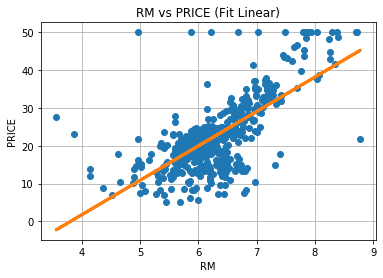

In [11]:
# TODO
yp = beta1*x + beta0

plt.plot(x,y,'o')
plt.plot(x, yp, '-', linewidth=3)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.grid(True)
plt.title('RM vs PRICE (Fit Linear)')

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    CRIM        XXXXX
    ZN          XXXXX
    INDUS       XXXXX
    ...         ...

You will need to write a loop. One option is to loop over the list of colunm names in the dataframe `df`.

What variable does the best job predicting house price?

LSTAT does the best job pridicting house price since it has the minimal lost (19472.3)

In [12]:
# TODO
for item in colnames:
    if item != 'PRICE':
        x = df[item].values
        y = df['PRICE'].values
        r = fit_linear(x,y)
        print(item,'  ',r[2])
    else:
        continue

CRIM    36275.512356275096
ZN    37166.55822394634
INDUS    32721.108150384098
CHAS    41404.21614437368
NOX    34916.16990783579
RM    22061.879196211798
AGE    36646.53435007064
DIS    40048.04884255197
RAD    36495.15481166092
TAX    33338.9613204406
PTRATIO    31702.013206967255
B    37966.40917900467
LSTAT    19472.38141832644


# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$. 

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,1)` and $\beta_1$ is in `np.arange(-10,10,.1)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [13]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x, 
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # min_loss = ...
    posiBeta0 = np.arange(-50,50,1)
    posiBeta1 = np.arange(-10,10,.1)
    min_loss = float("inf")
    beta0 = 0
    beta1 = 0
    
    for i in posiBeta0:
        for j in posiBeta1:
            loss = np.sum((y-i-j*x)**2)
            if (min_loss > loss):
                min_loss = loss
                beta0 = i
                beta1 = j
    
    return beta0, beta1, min_loss



Compare the output of `fit_approx` and `fit_linear` with `y` being `PRICE` and `x` being the `LSAT` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

In [14]:
lstatData = df['LSTAT']
priceData = df['PRICE']
fLResult = fit_linear(lstatData,priceData)
fAResult = fit_approx(lstatData,priceData)

print('Loss(fit_lnear)  ',fLResult[2])
print('Loss(fit_approx)  ',fAResult[2])


Loss(fit_lnear)   19472.38141832644
Loss(fit_approx)   19540.082422999883


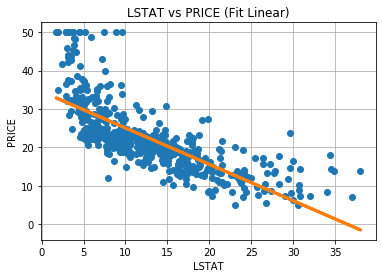

Text(0.5, 1.0, 'LSTAT vs PRICE (Fit APPROX)')

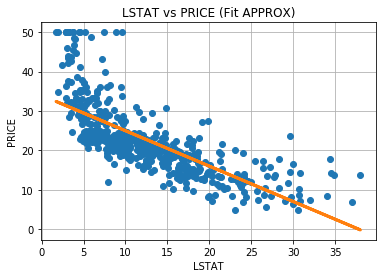

In [15]:
yp_linear = fLResult[1]*lstatData + fLResult[0]
plt.plot(lstatData,priceData,'o')
plt.plot(lstatData, yp_linear, '-', linewidth=3)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.grid(True)
plt.title('LSTAT vs PRICE (Fit Linear)')

plt.show()

yp_approx = fAResult[1]*lstatData + fAResult[0]
plt.plot(lstatData,priceData,'o')
plt.plot(lstatData, yp_approx, '-', linewidth=3)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.grid(True)
plt.title('LSTAT vs PRICE (Fit APPROX)')

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$ 
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [16]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x, 
    under the least absolute deviations loss.
    """
    # TODO complete the following code
  
    posiBeta0 = np.arange(-50,50,1)
    posiBeta1 = np.arange(-10,10,.1)
    min_loss = float("inf")
    beta0 = float("inf")
    beta1 = float("inf")
    
    for i in posiBeta0:
        for j in posiBeta1:
            loss = np.sum(abs(y-i-j*x))
            if (min_loss > loss):
                min_loss = loss
                beta0 = i
                beta1 = j
    
    return beta0, beta1, min_loss




In [17]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x, 
    under the max loss.
    """
    # TODO complete the following code

    posiBeta0 = np.arange(-50,50,1)
    posiBeta1 = np.arange(-10,10,.1)
    min_loss = float("inf")
    beta0 = 0
    beta1 = 0
    
    for i in posiBeta0:
        for j in posiBeta1:
            loss = np.max(abs(y-i-j*x))
            if (min_loss > loss):
                min_loss = loss
                beta0 = i
                beta1 = j
    
    return beta0, beta1, min_loss

Use your algorithm to obtain 3 different linear fits for `PRICE` with predictor variable `LSTAT`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) and write a few sentences on how they compare. Which loss/losses would you be most likely to use in the future?

Besed on the calulation below: 

The squared loss is: 19540.082422999883

The $\ell_1$ loss is: 2163.5600000000027

The $\ell_\infty$ loss is: 19.671000000000316

Because we use three different loss functions, we cannot simply compare these three values. By evaluating based on the plots, we can see that the first two loss functions perform better than the third one. Also, in this case the performance of squared loss is pretty similiar as the L1 loss. However, by looking through each data point, we can see that there are several extreme cases exist while LSTAT is between 0-10 and price is about 50, which also means if we use squared loss function it will casue large amount of loss. Therefore, I would like to use the fit_approx_l1() as my perferred one. 


Squared Loss is: 19540.082422999883
L1 loss is: 2163.5600000000027
Lmax loss is: 19.671000000000316


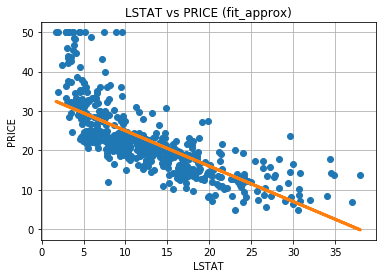

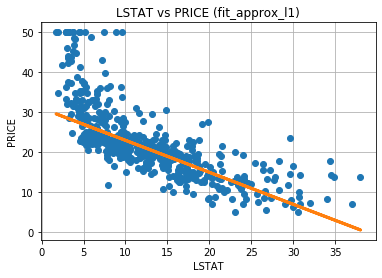

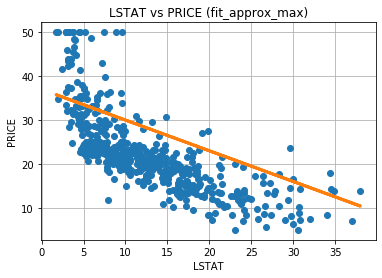

In [18]:

falResult = fit_approx_l1(lstatData,priceData)
famResult = fit_approx_max(lstatData,priceData)

print('Squared Loss is:',fAResult[2])
print('L1 loss is:', falResult[2])
print('Lmax loss is:',famResult[2])

yp_approx = fAResult[1]*lstatData + fAResult[0]
plt.plot(lstatData,priceData,'o')
plt.plot(lstatData, yp_approx, '-', linewidth=3)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.grid(True)
plt.title('LSTAT vs PRICE (fit_approx)')
plt.show()

yp_al = falResult[1]*lstatData + falResult[0]
plt.plot(lstatData,priceData,'o')
plt.plot(lstatData, yp_al, '-', linewidth=3)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.grid(True)
plt.title('LSTAT vs PRICE (fit_approx_l1)')
plt.show()

yp_am = famResult[1]*lstatData + famResult[0]
plt.plot(lstatData,priceData,'o')
plt.plot(lstatData, yp_am, '-', linewidth=3)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.grid(True)
plt.title('LSTAT vs PRICE (fit_approx_max)')
plt.show()
